# Clustering

Tutorial for clustering.

There is also example of loading files from disk using TF.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

## Create artificial data

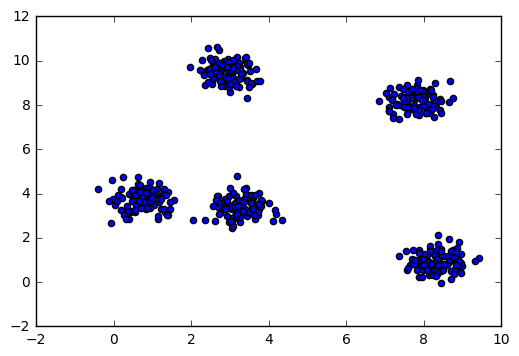

In [12]:
num_clusters = 5

# Generate random 2d point
def random_center():
    return np.random.random() * 10.0, np.random.random() * 10.0

# Generate data for single cluster
def gen_data():
    center_x, center_y = random_center()
    x1 = np.random.normal(center_x, 0.4, (100, 1))
    x2 = np.random.normal(center_y, 0.4, (100, 1))
    return np.hstack([x1, x2])
    
xs = np.vstack([gen_data() for i in range(num_clusters)])
# Randomize data
arr = np.arange(xs.shape[0])
np.random.shuffle(arr)
xs = xs[arr, :]
# Plot
plt.scatter(xs[:, 0], xs[:, 1])
plt.show()

## k-means algorithm

This is very simple algorithm, which consists of 2 steps:

  1. Assign each point to the nearest center
  2. Move center to the middle of the assigned points

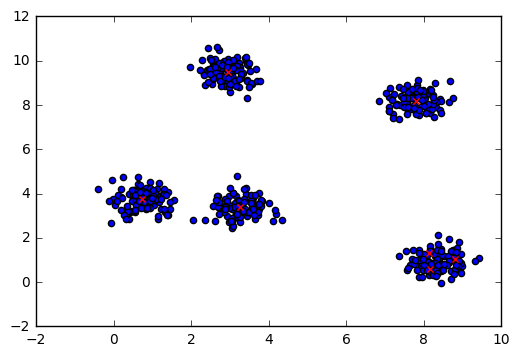

In [15]:
k = 7
steps = 100

X = tf.constant(xs)
# Initialize cluster centres
cluster_centroids = tf.Variable(xs[0:k, :])

# Assign points to the cluster
def assign_cluster(X, centroids):
    expanded_vectors = tf.expand_dims(X, 0)
    expanded_centroids = tf.expand_dims(centroids, 1)
    squared = tf.square(tf.subtract(expanded_vectors, expanded_centroids))
    distances = tf.reduce_sum(squared, 2)
    return tf.argmin(distances, 0)


# Recompute centroids
def recompute_centroids(X, Y):
    sums = tf.unsorted_segment_sum(X, Y, k)
    counts = tf.unsorted_segment_sum(tf.ones_like(X), Y, k)
    return sums / counts
    

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())    
    for i in range(steps):
        Y = assign_cluster(X, cluster_centroids)
        cluster_centroids = sess.run(recompute_centroids(X, Y))

plt.scatter(xs[:, 0], xs[:, 1])
plt.scatter(cluster_centroids[:, 0], cluster_centroids[:, 1], c='r', marker='x')
plt.show()